In [13]:
import numpy as np
from model_age import model_generate_age
from model_gender import model_generate_gender
from model_emotion import model_generate_emotion
from matplotlib.pyplot import imshow
%matplotlib inline

In [18]:
# Compute the accuracy of the emotion dataset
def compute_accuracy(model, X_test, Y_test):
    Y_test_pred = model.predict(X_test, verbose=1)
    Y_test_pred_arg = np.argmax(Y_test_pred, axis=1)
    count = 0
    for i in range(Y_test.shape[0]):
        if (Y_test[i][Y_test_pred_arg[i]] == np.max(Y_test[i])):
            count += 1
    accuracy_score_test = count / Y_test.shape[0]
    print(accuracy_score_test)

In [19]:
emotion_table = {0: 'neutral',
                 1: 'happiness',
                 2: 'surprise',
                 3: 'sadness',
                 4: 'anger',
                 5: 'disgust',
                 6: 'fear',
                 7: 'contempt'}

In [20]:
gender_table = {0: 'man',
                1: 'woman'
               }

In [21]:
# Read the dataset
X_test = np.load('../../data/Emotion/Test/final_data.npy')
Y_test = np.load('../../data/Emotion/Test/final_labels_data.npy')

In [22]:
model_emotion, model_gender, model_age = model_generate_emotion(8), model_generate_gender(2), model_generate_age(1)

In [23]:
# Load the weights into our models
model_emotion.load_weights('../logs/weights-emotion.h5')
model_gender.load_weights('../logs/weights-gender.h5')
model_age.load_weights('../logs/weights-age.h5')

In [24]:
# Test set accuracy
compute_accuracy(model_emotion, X_test, Y_test)

3507/3507 [==============================] - 165s   
0.8494439692044482


### Examples

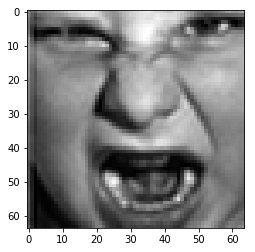

In [37]:
img = np.reshape(X_test[300], newshape=(1,64,64,1))
imshow(np.reshape(img, newshape=(64,64)), cmap='gray')

In [38]:
actual_emotion = emotion_table[np.argmax(Y_test[300])]
print('Actual Emotion:', actual_emotion)

Actual Emotion: anger


In [39]:
predicted_emotion = emotion_table[np.argmax(model_emotion.predict(img))]
print('Predicted Emotion:', predicted_emotion)

Predicted Emotion: anger


In [40]:
predicted_gender = gender_table[np.argmax(model_gender.predict(img))]
print('Predicted Gender:', predicted_gender)

Predicted Gender: man
